In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


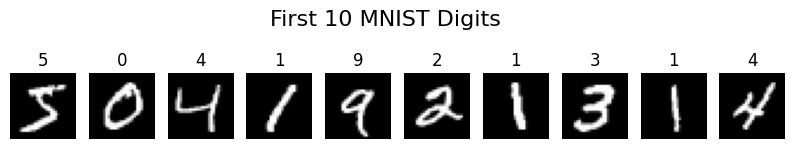

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis("off")
    plt.suptitle("First 10 MNIST Digits", fontsize=16)
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
def preprocess_mnist_data():
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.utils import to_categorical

    # Load data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Reshape for CNN (add channel dimension)
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # Normalize
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # One-hot encode
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test


In [ ]:
x_train, y_train, x_test, y_test = preprocess_mnist_data()

print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000, 10)


(60000, 28, 28, 1)
(60000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam

def model():
  model = Sequential([
      Flatten(input_shape=(28,28)),
      Dense(128, activation='relu'),
      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [ ]:
x_train, y_train, x_test, y_test = preprocess_mnist_data()
model = model()
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8674 - loss: 0.4568 - val_accuracy: 0.9662 - val_loss: 0.1210
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.1243 - val_accuracy: 0.9717 - val_loss: 0.0967
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9762 - loss: 0.0805 - val_accuracy: 0.9710 - val_loss: 0.0965
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9817 - loss: 0.0586 - val_accuracy: 0.9778 - val_loss: 0.0809
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0453 - val_accuracy: 0.9803 - val_loss: 0.0695
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0336 - val_accuracy: 0.9758 - val_loss: 0.0861
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9924 - loss: 0.0265 - val_accuracy: 0.9770 - val_loss: 0.0811
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9947 - loss: 0.0195 -

In [ ]:
test_loss , test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.1012
Test Accuracy: 97.76%


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


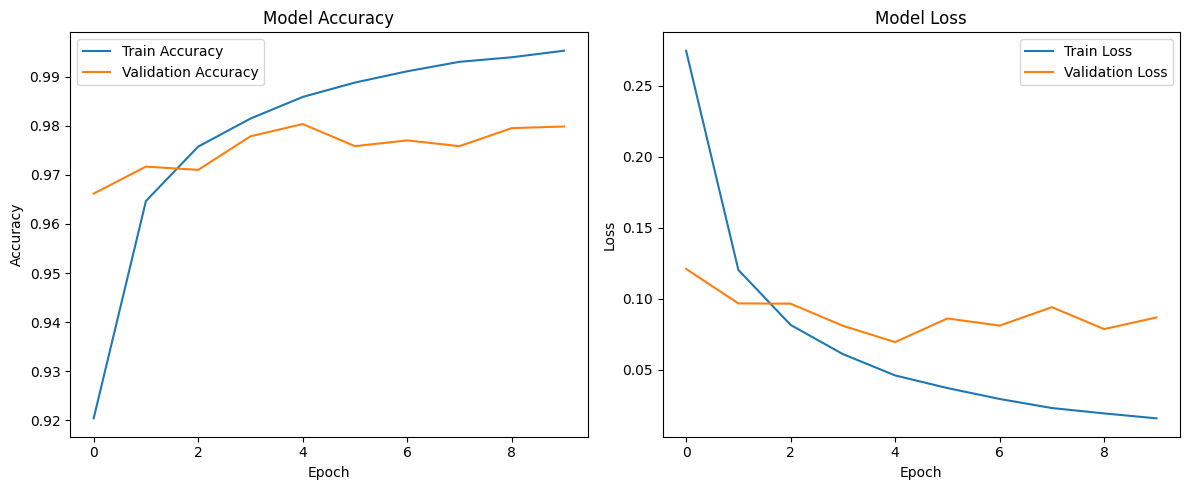

In [ ]:
plot_training_history(history)


In [ ]:
def build_deeper_model():
    model_1 = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),      # First hidden layer
        Dense(64, activation='relu'),       # Second hidden layer
        Dense(10, activation='softmax')     # Output layer
    ])

    model_1.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model_1

In [ ]:
model_1 = build_deeper_model()
history_1 = model_1.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8747 - loss: 0.4364 - val_accuracy: 0.9677 - val_loss: 0.1123
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9659 - loss: 0.1098 - val_accuracy: 0.9745 - val_loss: 0.0876
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9791 - loss: 0.0688 - val_accuracy: 0.9762 - val_loss: 0.0827
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9834 - loss: 0.0533 - val_accuracy: 0.9772 - val_loss: 0.0801
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.9782 - val_loss: 0.0781
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.9780 - val_loss: 0.0823
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9915 - loss: 0.0255 - val_accuracy: 0.9770 - val_loss: 0.0877
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0218 - 

In [ ]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0897
Test Accuracy: 98.15%


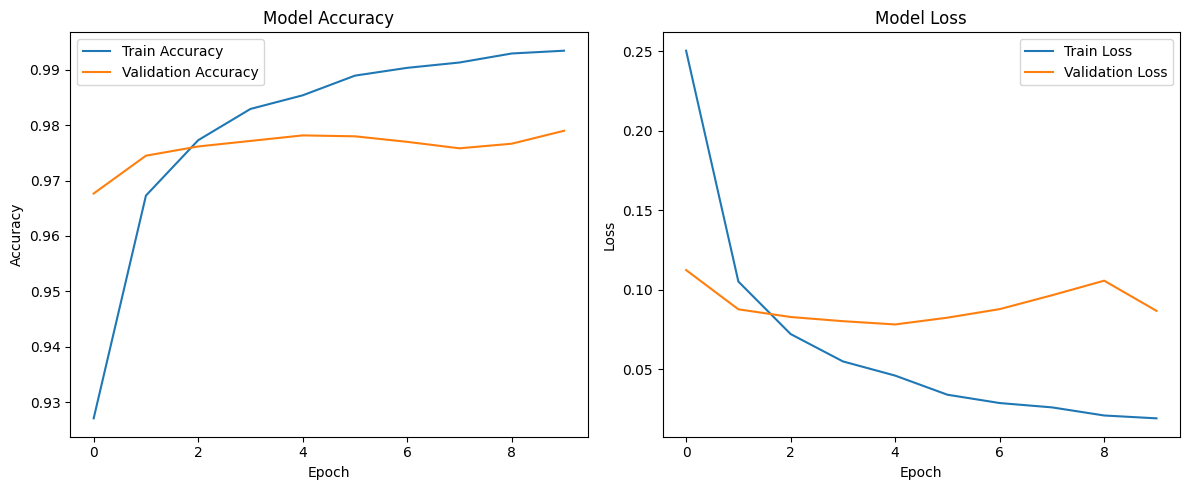

In [ ]:
plot_training_history(history_1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
cnn_model = build_cnn_model()

history = cnn_model.fit(x_train, y_train,
                        validation_split=0.1,
                        epochs=10,
                        batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8840 - loss: 0.3648 - val_accuracy: 0.9850 - val_loss: 0.0565
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9910 - val_loss: 0.0343
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0458 - val_accuracy: 0.9910 - val_loss: 0.0364
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9918 - val_loss: 0.0323
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9882 - val_loss: 0.0441
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0231 - val_accuracy: 0.9920 - val_loss: 0.0328
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9940 - loss: 0.0169 - val_accuracy: 0.9925 - val_loss: 0.0319
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9952 - loss: 0.0151

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0308
Test Accuracy: 99.27%


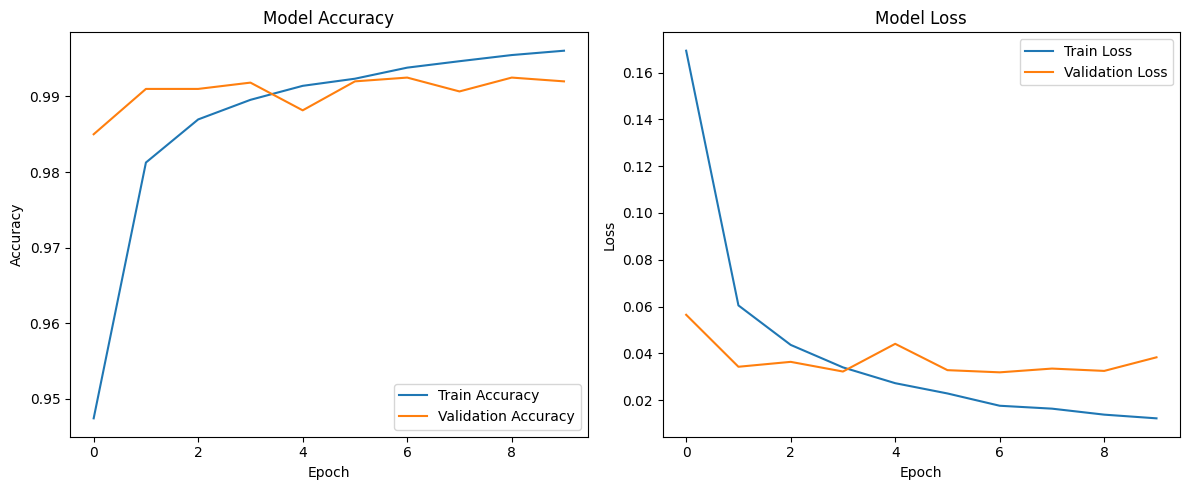

In [ ]:
plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


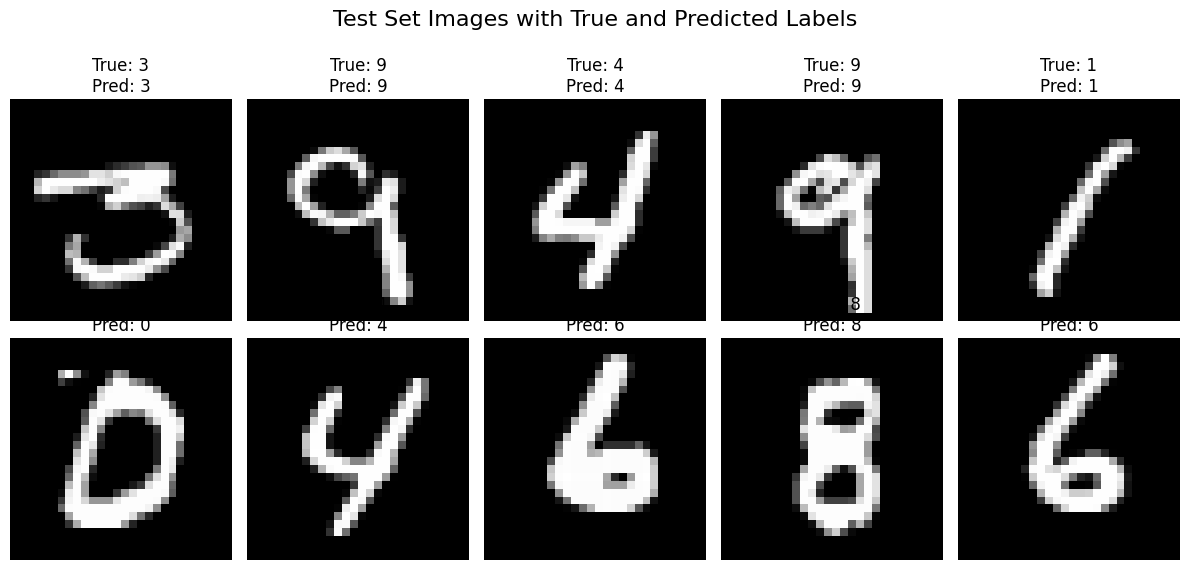

In [ ]:
# prompt: i want to visualize my test set image and result

import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = cnn_model.predict(x_test)

# Get the predicted class for each test image
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class for each test image
true_classes = np.argmax(y_test, axis=1)

# Find the indices of a few test images to visualize
num_images_to_show = 10
indices_to_show = np.random.choice(len(x_test), num_images_to_show, replace=False)

plt.figure(figsize=(12, 6))
for i, index in enumerate(indices_to_show):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[index]}\nPred: {predicted_classes[index]}")
    plt.axis("off")

plt.suptitle("Test Set Images with True and Predicted Labels", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for the title
plt.show()


Please upload an image of a handwritten digit (28x28 grayscale is ideal, but the code will resize and convert).


Saving Screenshot 2025-06-05 233558.png to Screenshot 2025-06-05 233558.png
User uploaded file "Screenshot 2025-06-05 233558.png"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The predicted digit is: 3


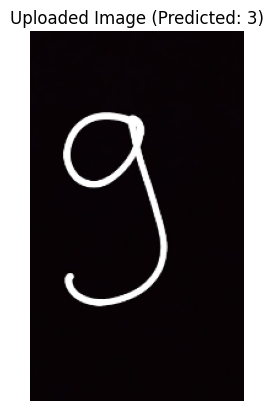

In [ ]:
# prompt: can you make me a predictive system which take input from users and my model will prdeict it

import matplotlib.pyplot as plt
import numpy as np
# To make predictions based on user input, we need a way for the user to provide an image.
# Since we are in a Colab/Jupyter environment, we can use the File Upload widget.
# We will then preprocess the uploaded image to match the input shape of the model (28x28 grayscale).
# The best performing model from the previous steps appears to be the `cnn_model`.

from google.colab import files
from PIL import Image
import io

# Function to preprocess the uploaded image
def preprocess_user_image(uploaded_file):
    # Read the image file
    img = Image.open(io.BytesIO(uploaded_file)).convert('L') # Convert to grayscale
    img = img.resize((28, 28)) # Resize to 28x28
    img_array = np.array(img) # Convert to numpy array
    img_array = img_array / 255.0 # Normalize
    img_array = img_array.reshape(1, 28, 28, 1) # Reshape for the CNN model (add batch and channel dimensions)
    return img_array

# Function to predict the digit from the preprocessed image
def predict_digit(image_array, model):
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# --- User Interaction ---

print("Please upload an image of a handwritten digit (28x28 grayscale is ideal, but the code will resize and convert).")

uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        print(f'User uploaded file "{filename}"')
        img_data = uploaded[filename]

        # Preprocess the uploaded image
        processed_image = preprocess_user_image(img_data)

        # Use the trained CNN model to predict
        predicted_digit = predict_digit(processed_image, cnn_model)

        print(f"The predicted digit is: {predicted_digit}")

        # Optional: Display the uploaded image
        uploaded_img = Image.open(io.BytesIO(img_data))
        plt.imshow(uploaded_img, cmap='gray')
        plt.title(f"Uploaded Image (Predicted: {predicted_digit})")
        plt.axis("off")
        plt.show()
else:
    print("No file was uploaded.")

In [ ]:
# prompt: save this model

# Save the best performing model (cnn_model in this case)
cnn_model.save('mnist_cnn_model.h5')
print("CNN model saved successfully!")

CNN model saved successfully!
